In [ ]:
# imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [4]:
# general gradient function
def grad(f): 
    def grad_help(*args):
        h = 1e-5
        dim = len(args)
        return [(f(*[args[j] + (h if j == i else 0) for j in range(dim)]) -
                f(*[args[j] - (h if j == i else 0) for j in range(dim)]))/(2*h)
                for i in range(dim)]
    return grad_help

In [5]:
# example
def f(x, y): 
    return np.sin(0.5 * x**2 - 0.25 * y**2 + 3)*np.cos(2*x+1-np.exp(y))

In [6]:
# gradient descent
def gradient_descent(f, lr0, d, epoch, x):
    points = np.zeros((epoch, 2))
    points[0] = x
    for i in range(1, epoch):
        x = x - lr0*np.exp(-d*i) * np.array(grad(f)(*x))
        points[i] = x  
    return points

def gradient_descent_const(f, lr, epoch, x):
    return gradient_descent(f, lr, 0, epoch, x)
# points = gradient_descent_const(f, lr0, epoch, x)

lr0 = 1
d = 0.1
epoch = 200
x = [-0.1, -0.4]
#x = [0.,0.]
points = gradient_descent(f, lr0, d, epoch, x)

In [7]:
# Метод золотого сечения
def golden(f, a, b, eps):
    phi = (1 + np.sqrt(5))/2
    def min_rec(f, eps, a, b, fx1, fx2):
        if b-a < eps:
            return (a+b)/2
        else:
            t = (b-a)/phi
            x1, x2 = b - t, a + t
            fx1 = f(x1) if fx1 == None else fx1
            fx2 = f(x2) if fx2 == None else fx2

            if fx1 >= fx2:
                return min_rec(f, eps, x1, b, fx2, None)
            else:
                return min_rec(f, eps, a, x2, None, fx1)
    return min_rec(f, eps, min(a,b), max(a,b), None, None)                 

# a if condition else b

0.15140484834286122


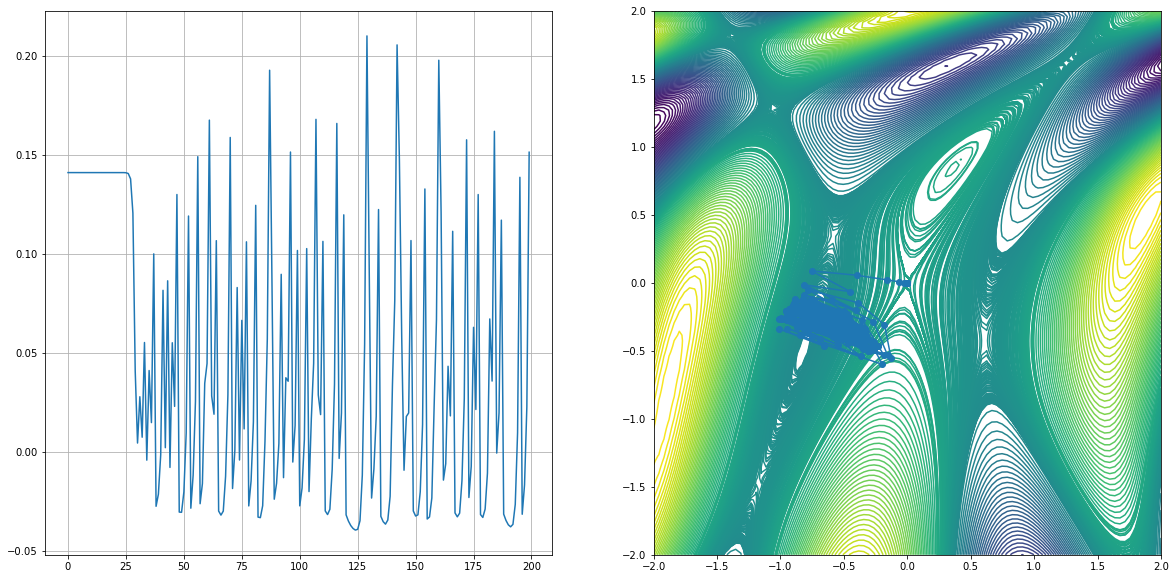

-0.04004296484967504


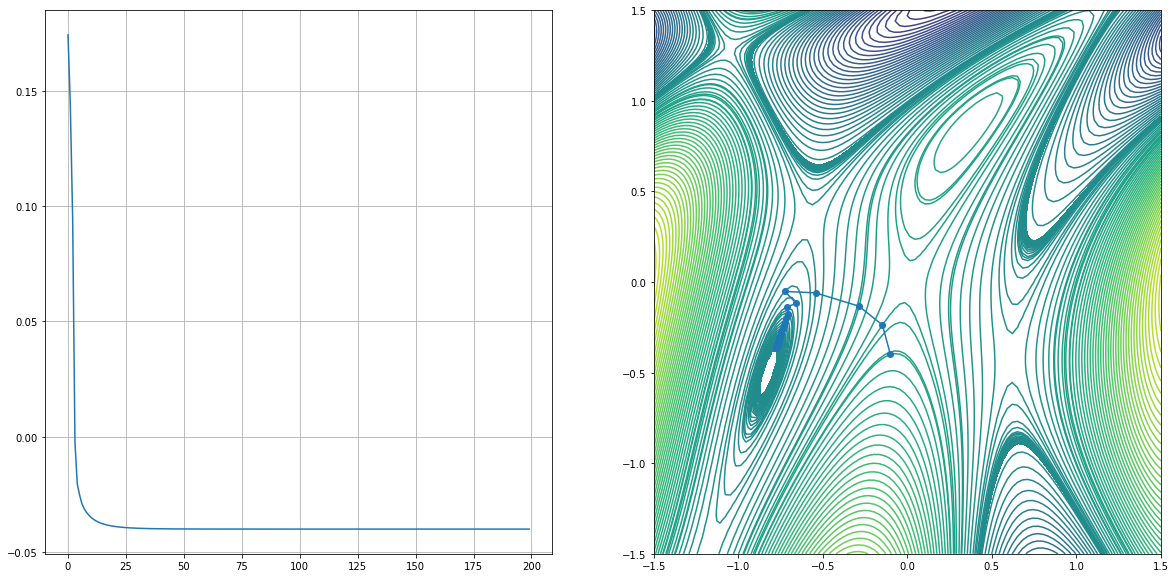

In [ ]:


# plotting
t = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(t, t)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(f(points[:, 0], points[:, 1]))
ax1.grid()
ax2.plot(points[:, 0], points[:, 1], 'o-')
ax2.contour(X, Y, f(X, Y), levels=sorted([f(*p) for p in points] + list(np.linspace(-1, 1, 100))))
print(f(points[-1, 0], points[-1, 1]))

0.1411200080588929
-0.012536534273058501
-0.04198326472120327
0.15140484834286122


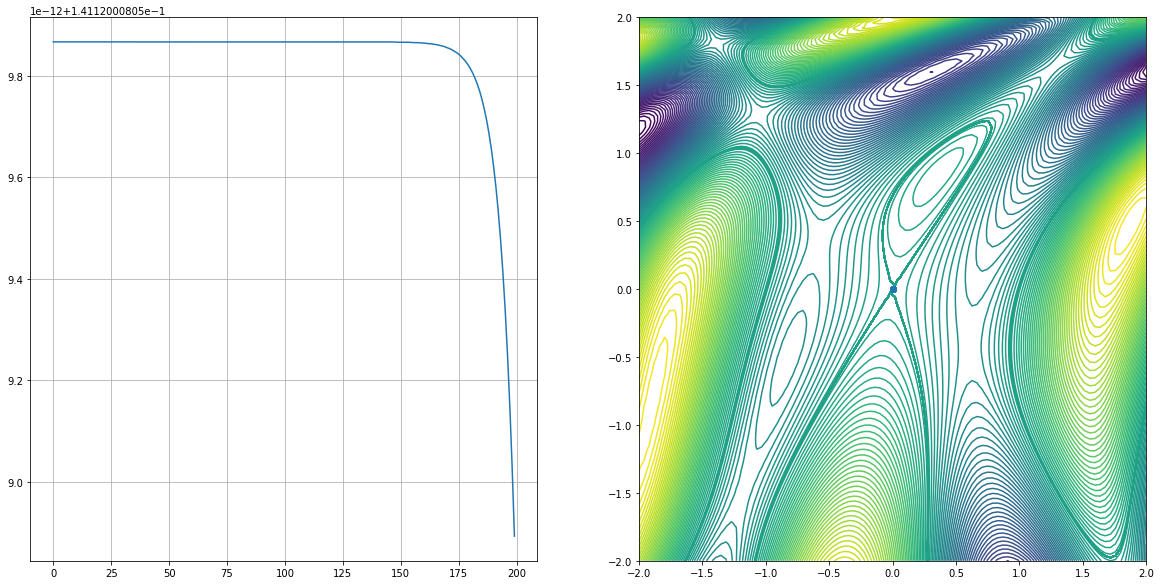

In [50]:
def method(f, tmin, tmax, lr0):
    # lr0 = 1
    d = 0
    epoch = 200
    x = [0,0]
    points = gradient_descent(f, lr0, d, epoch, x)
    t = np.linspace(tmin, tmax, 100)
    X, Y = np.meshgrid(t, t)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(f(points[:, 0], points[:, 1]))
    ax1.grid()
    ax2.plot(points[:, 0], points[:, 1], 'o-')
    ax2.contour(X, Y, f(X, Y), levels=sorted(list(set([f(*p) for p in points] + list(np.linspace(-1, 1, 100))))))
    print(f(points[-1, 0], points[-1, 1]))
method(f, -2, 2, 0.05)
method(f, -2, 2, 0.1)
method(f, -2, 2, 0.5)
method(f, -2, 2, 1)
# method(lambda x,y: (x+1)**2 + (x-1)**2, -20, 20, 0.1)